In [1]:
import MDAnalysis as mda
from modules.distances import *
from modules.dssp import dssp, plot_dssp_average, calc_dssp_matrix
from modules.input import show_fasta
from typing import Tuple
%reload_ext autoreload
%autoreload 2
import input

In [2]:
atomistic_system, reference_structure, energy_like_terms, is_aligned = input.read_files()

Aligned file found, reading this instead


In [5]:
step = 20 ## take a frame every step 0.01ns
start, stop = 80 , None ## None for max values
alpha, beta = calc_dssp_matrix(atomistic_system, step, start, stop)

--EE----------------------HHHHHHH----------------EE---HHHH--------------------------HHHHHH--HHH------E--E------------------------
--EE---------------------EHHHHH------------------EE---HHHH----------HHH-------------HHHHHHHHHH-------E--E---HHH-------------E----
--E----------------------EHHHHH-------------------E---HHHH--------------------------HHHHHHHHHHHH----------------------------E----
--EE---------------------E-HHHH------------------EE---HHHH--------------------------HHHH----HHH------E--E-------------------E----
--E----------------------EHHHHH---HHH-------------E---HHHH--------------------------HHHH--HHHH-------E--E-------------------E----
--EE---------------------EHHHHH------------------EE---HHHHH-------------------------HHHHHHHHHH-------E--E-------------------E----
--EE---------------------E-HHHH------------------EE---HHHH--------------------------HHHHHHHHHH--------------HHH-------------E----
--EE--HHH----------------EHHHHH------------------EE---HHHH----------HHH-------------HHHHHH

----5----10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95---100--105--110--115--120--125--
SSSAPARSSSASKKAVTPSRSALPSNWKQELESLRSSSPAPASSAPAPARSSSASWRDAAPASSAPARSSSSKKAVTPSRSALPSNWKQELESLRSSSPAPASSAPAPARSSSASWRDAAPAENLYFQS
------HHH---------------------------------------------HHHH---------E---E------------HHHHHHHHHHHH--------------------------E--E---
---E--HHH-----------------HHHHH------------------E----HHHH----------HHH-------------HHHH--HHHH--------------HHH------------------


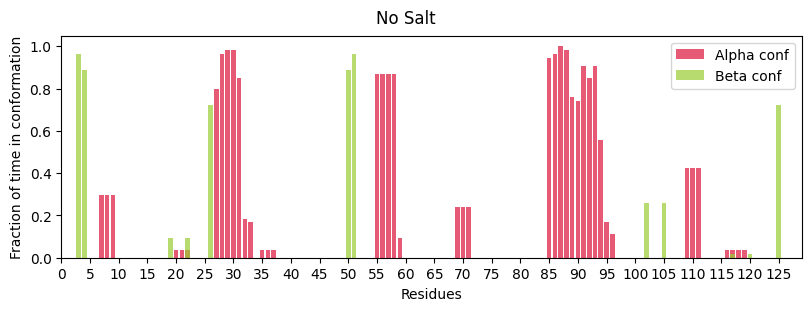

In [6]:

fig, bar_plot = plot_dssp_average(atomistic_system, alpha, beta)

fig.suptitle("No Salt")
## add mutant labels
if False:
    #markers = [60,61,62] #APA 60,61,62
    #markers = [68,69,70] #RSS 68,69,70
    markers = [56,87] #WW QQ
    bar_plot.scatter(markers,[0 for x in markers], 
                    marker = "D", color="deepskyblue", linewidths=1, zorder=10, clip_on=False, label = "mutation")
    h,l = bar_plot.get_legend_handles_labels()
    h.append(h.pop(0))
    l.append(l.pop(0))
    bar_plot.legend(h,l)
else:
    bar_plot.legend()

atomistic_system.trajectory[start]
show_fasta(atomistic_system)

atomistic_system.trajectory[60*100]
protein = atomistic_system.select_atoms("protein")
dsspline = dssp(protein)
print(dsspline)